In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/emelz/Documents/code/pingdom-parser/jupyter/data/report.csv')

In [3]:
df.head()

,Status,Date and Time,Response Time (ms),Error,Location
0,up,03/30/2022 01:52:33 PM,703 ms,OK,Stockholm 2 (Sweden)
1,up,03/30/2022 01:51:33 PM,402 ms,OK,Los Angeles 3 (CA)
2,up,03/30/2022 01:50:33 PM,259 ms,OK,Philadelphia 2 (PA)
3,up,03/30/2022 01:49:33 PM,473 ms,OK,Portland 2 (OR)
4,up,03/30/2022 01:48:33 PM,523 ms,OK,Frankfurt 3 (Germany)


In [6]:
locations = df.Location.unique()
locations.size

11

In [7]:
locations

array(['Stockholm 2 (Sweden)', 'Los Angeles 3 (CA)',
       'Philadelphia 2 (PA)', 'Portland 2 (OR)', 'Frankfurt 3 (Germany)',
       'Dusseldorf 2 (Germany)', 'Warsaw (Poland)', 'Chicago 2 (IL)',
       'San Francisco 2 (CA)', 'Thessaloniki (Greece)', 'London 5 (UK)'],
      dtype=object)

In [91]:
# From https://janakiev.com/blog/gps-points-distance-python/
import math

def haversine(coord1, coord2):
    #R = 6372800  # Earth radius in meters
    R = 3958.756  # Earth radius miles
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return int(2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a)))

In [92]:
stockholm_lat = 59.334591
stockholm_lon = 18.063240
stockholm_coords = stockholm_lat, stockholm_lon

la_lat = 34.052235
la_lon = -118.243683
la_coords = la_lat, la_lon

phil_lat = 39.952583
phil_lon = -75.165222
phil_coords = phil_lat, phil_lon

portland_lat = 45.523064
portland_lon = -122.676483
portland_coords = portland_lat, portland_lon

frankfurt_lat = 50.110924
frankfurt_lon = 8.682127
frankfurt_coords = frankfurt_lat, frankfurt_lon

dusseldorf_lat = 51.233334
dusseldorf_lon = 6.783333
dusseldorf_coords = dusseldorf_lat, dusseldorf_lon

warsaw_lat = 52.237049
warsaw_lon = 21.017532
warsaw_coords = warsaw_lat, warsaw_lon

chicago_lat = 41.881832
chicago_lon = -87.623177
chicago_coords = chicago_lat, chicago_lon

sanfran_lat = 37.773972
sanfran_lon = -122.431297
sanfran_coords = sanfran_lat, sanfran_lon

thessaloniki_lat = 40.629269
thessaloniki_lon = 22.947412
thessaloniki_coords = thessaloniki_lat, thessaloniki_lon

london_lat = 51.509865
london_lon = -0.118092
london_coords = london_lat, london_lon

va_lat = 39.006699
va_lon = -77.429131
va_coords = va_lat, va_lon


data = [['Stockholm 2 (Sweden)', 'Stockholm', stockholm_lat, stockholm_lon, haversine(stockholm_coords, va_coords)],
        ['Los Angeles 3 (CA)', 'Los Angeles', la_lat, la_lon, haversine(la_coords, va_coords)],
        ['Philadelphia 2 (PA)', 'Philadelphia', phil_lat, phil_lon, haversine(phil_coords, va_coords)],
        ['Portland 2 (OR)', 'Portland', portland_lat, portland_lon, haversine(portland_coords, va_coords)],
        ['Frankfurt 3 (Germany)', 'Frankfurt', frankfurt_lat, frankfurt_lon, haversine(frankfurt_coords, va_coords)],
        ['Dusseldorf 2 (Germany)', 'Dusseldorf', dusseldorf_lat, dusseldorf_lon, haversine(dusseldorf_coords, va_coords)],
        ['Warsaw (Poland)', 'Warsaw', warsaw_lat, warsaw_lon, haversine(warsaw_coords, va_coords)],
        ['Chicago 2 (IL)', 'Chicago', chicago_lat, chicago_lon, haversine(chicago_coords, va_coords)],
        ['San Francisco 2 (CA)', 'San Francisco', sanfran_lat, sanfran_lon, haversine(sanfran_coords, va_coords)],
        ['Thessaloniki (Greece)', 'Thessaloniki', thessaloniki_lat, thessaloniki_lon, haversine(thessaloniki_coords, va_coords)],
        ['London 5 (UK)', 'London', london_lat, london_lon, haversine(london_coords, va_coords)]
       ]

In [93]:
df_loc = pd.DataFrame(data, columns = ['Location', 'Location_short', 'lat', 'lon', 'distance_mi'])

In [94]:
df_loc

,Location,Location_short,lat,lon,distance_mi
0,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
1,Los Angeles 3 (CA),Los Angeles,34.052235,-118.243683,2272
2,Philadelphia 2 (PA),Philadelphia,39.952583,-75.165222,137
3,Portland 2 (OR),Portland,45.523064,-122.676483,2325
4,Frankfurt 3 (Germany),Frankfurt,50.110924,8.682127,4068
5,Dusseldorf 2 (Germany),Dusseldorf,51.233334,6.783333,3961
6,Warsaw (Poland),Warsaw,52.237049,21.017532,4468
7,Chicago 2 (IL),Chicago,41.881832,-87.623177,571
8,San Francisco 2 (CA),San Francisco,37.773972,-122.431297,2413
9,Thessaloniki (Greece),Thessaloniki,40.629269,22.947412,4997


In [95]:
df_merged = pd.merge(df, df_loc, how='inner', on='Location')

In [97]:
df_merged

,Status,Date and Time,Response Time (ms),Error,Location,Location_short,lat,lon,distance_mi
0,up,03/30/2022 01:52:33 PM,703 ms,OK,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
1,up,03/30/2022 01:42:33 PM,674 ms,OK,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
2,up,03/30/2022 01:32:33 PM,702 ms,OK,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
3,up,03/30/2022 01:22:33 PM,680 ms,OK,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
4,up,03/30/2022 01:12:33 PM,565 ms,OK,Stockholm 2 (Sweden),Stockholm,59.334591,18.063240,4129
...,...,...,...,...,...,...,...,...,...
9995,up,03/23/2022 03:57:33 PM,558 ms,OK,London 5 (UK),London,51.509865,-0.118092,3676
9996,up,03/23/2022 03:47:33 PM,558 ms,OK,London 5 (UK),London,51.509865,-0.118092,3676
9997,up,03/23/2022 03:37:33 PM,462 ms,OK,London 5 (UK),London,51.509865,-0.118092,3676
9998,up,03/23/2022 03:27:33 PM,427 ms,OK,London 5 (UK),London,51.509865,-0.118092,3676


In [118]:
df_dist_latency = df_merged[['distance_mi', 'Response Time (ms)']]

df_latency = df_dist_latency['Response Time (ms)'].apply(lambda x: int(x.replace(',', '').split(' ')[0]))

df_dist_latency['latency'] = df_latency

/Users/emelz/opt/miniconda3/envs/XCS221/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [119]:
df_dist_latency.head()

,distance_mi,Response Time (ms),latency
0,4129,703 ms,703
1,4129,674 ms,674
2,4129,702 ms,702
3,4129,680 ms,680
4,4129,565 ms,565


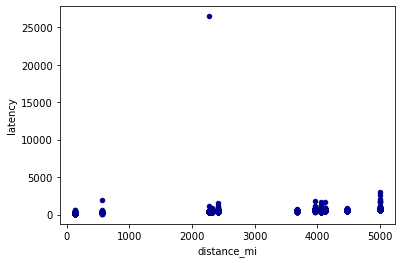

In [121]:
ax1 = df_dist_latency.plot.scatter(x='distance_mi', y='latency', c='DarkBlue')

In [127]:
df_dist_latency.loc[df_dist_latency['latency'] > 10000]

,distance_mi,Response Time (ms),latency
1227,2272,"26,477 ms",26477


In [130]:
df_dist_latency.shape

(10000, 3)

In [132]:
df_dist_latency2 = df_dist_latency.drop(df_dist_latency[df_dist_latency.latency > 10000].index)

In [133]:
df_dist_latency2.shape

(9999, 3)

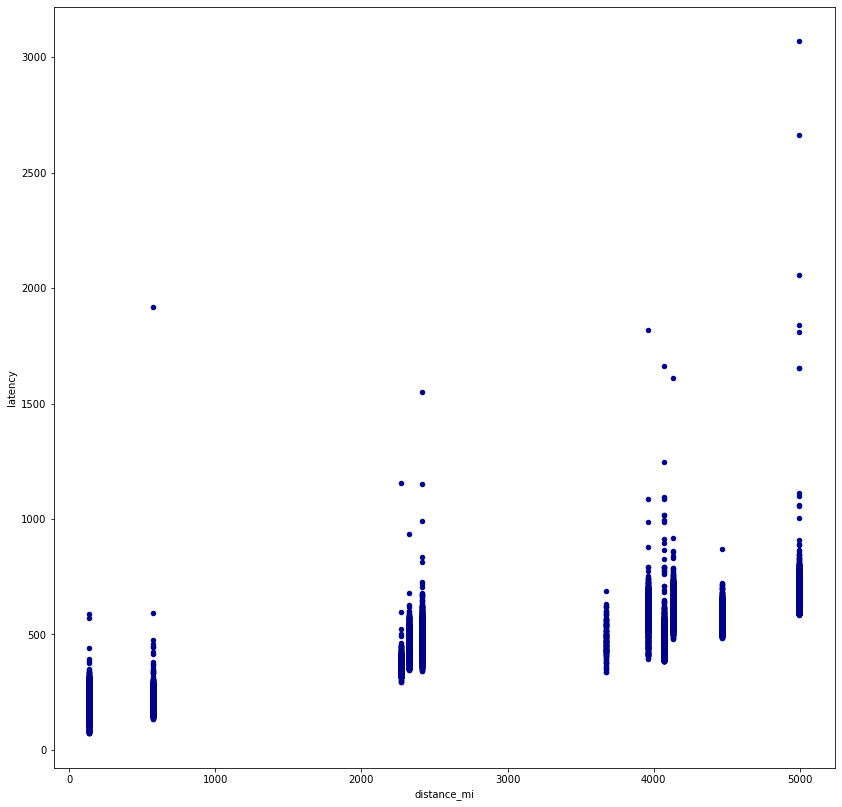

In [136]:
ax2 = df_dist_latency2.plot.scatter(x='distance_mi', y='latency', c='DarkBlue', figsize = (14,14))

In [138]:
df_dist_latency2.latency.min()

72